In [1]:
import pandas as pd
import numpy as np
import os
from keplergl import KeplerGl
from pyproj import CRS
import numpy as np
from matplotlib import pyplot as plt

In [2]:
# Set system path

path = r'C:\Users\Stony\OneDrive\CareerFoundry\Data Specialization Course\envs\Citi-Bike'
#path = r'C:\Users\Stony\Videos\CareerFoundry\Citi-Bike'

In [3]:
# Import dataset from prior exercise

df_final = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'final_data.csv'), index_col = 0)

C:\Users\Stony\AppData\Local\Temp\ipykernel_21132\1699888674.py:3: DtypeWarning: Columns (6,8) have mixed types. Specify dtype option on import or set low_memory=False.
  df_final = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'final_data.csv'), index_col = 0)


In [5]:
df_final.dtypes

ride_id                object
rideable_type          object
started_at             object
ended_at               object
start_station_name     object
start_station_id       object
end_station_name       object
end_station_id         object
start_lat             float64
start_lng             float64
end_lat               float64
end_lng               float64
member_casual          object
avgTemp               float64
bike_rides_daily        int64
started                object
ride_date              object
dtype: object

In [6]:
# Create a value column and group by start and end station 

df_final['value'] = 1
df_group = df_final.groupby(['end_station_name', 'start_station_name', ]).agg({'value':'count', 'end_lat':'mean', 'end_lng':'mean', 'start_lat':'mean', 'start_lng':'mean'}).reset_index()

In [7]:
df_group

,end_station_name,start_station_name,value,end_lat,end_lng,start_lat,start_lng
0,1 Ave & E 110 St,1 Ave & E 110 St,791,40.792327,-73.938300,40.792335,-73.938280
1,1 Ave & E 110 St,1 Ave & E 16 St,5,40.792327,-73.938300,40.732295,-73.981624
2,1 Ave & E 110 St,1 Ave & E 18 St,6,40.792327,-73.938300,40.733910,-73.980488
3,1 Ave & E 110 St,1 Ave & E 30 St,25,40.792327,-73.938300,40.741497,-73.976623
4,1 Ave & E 110 St,1 Ave & E 39 St,78,40.792327,-73.938300,40.747149,-73.971126
...,...,...,...,...,...,...,...
1013392,Yankee Ferry Terminal,West St & Liberty St,3,40.687066,-74.016756,40.711444,-74.014847
1013393,Yankee Ferry Terminal,Whitehall St & Bridge St,1,40.687066,-74.016756,40.703662,-74.013181
1013394,Yankee Ferry Terminal,William St & Pine St,2,40.687066,-74.016756,40.707179,-74.008873
1013395,Yankee Ferry Terminal,Yankee Ferry Terminal,5759,40.687066,-74.016756,40.687067,-74.016754


In [10]:
# Get the top 100 routes from the top starting stations

top100 = df_group.nlargest(100, 'value')

In [12]:
print(top100['value'].sum())
print(top100.shape)

388724
(100, 7)


In [13]:
top100['value'].describe()

count      100.000000
mean      3887.240000
std       1431.685438
min       2729.000000
25%       2977.750000
50%       3432.500000
75%       4231.500000
max      12041.000000
Name: value, dtype: float64

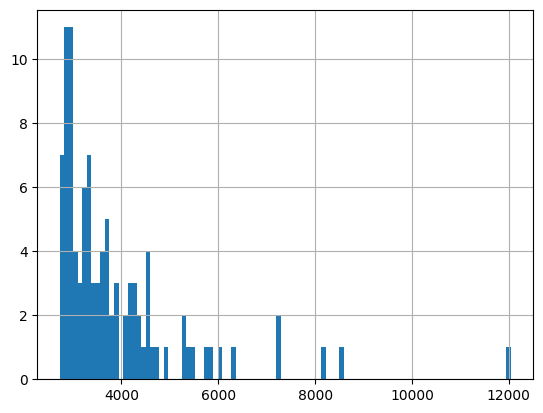

In [15]:
top100['value'].hist(bins = 100)
plt.show()

[]

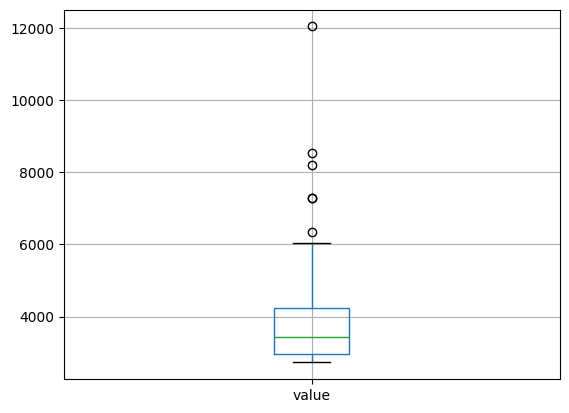

In [16]:
b_plot = top100.boxplot(column = 'value') 
b_plot.plot()

In [17]:
top100['value'].sort_index().value_counts()

value
2924    2
3713    2
2862    2
5826    1
3325    1
       ..
3229    1
3597    1
3171    1
4299    1
5759    1
Name: count, Length: 97, dtype: int64

In [18]:
top100.to_csv(os.path.join(path, '02 Data', 'Prepared Data', 'df_top_100_routes.csv'))

In [19]:
top100.head()

,end_station_name,start_station_name,value,end_lat,end_lng,start_lat,start_lng
295963,Central Park S & 6 Ave,Central Park S & 6 Ave,12041,40.765909,-73.976342,40.765913,-73.976346
148889,7 Ave & Central Park South,7 Ave & Central Park South,8541,40.766741,-73.979069,40.766733,-73.979084
783607,Roosevelt Island Tramway,Roosevelt Island Tramway,8213,40.757284,-73.953600,40.757282,-73.953597
546962,Grand Army Plaza & Central Park S,Grand Army Plaza & Central Park S,7287,40.764397,-73.973715,40.764393,-73.973730
801965,Soissons Landing,Soissons Landing,7275,40.692317,-74.014866,40.692320,-74.014865


In [17]:
# Take a 30% sample of the dataframe to create the KeplerGl plot

df_sample = df_group.sample(frac=0.3, random_state=1)
print(df_sample)

                            end_station_name    end_lat    end_lng  \
1116657                  Broadway & W 133 St  40.819034 -73.956156   
837673              Amsterdam Ave & W 172 St  40.842173 -73.935111   
3502873             Pacific St & Classon Ave  40.679194 -73.958790   
3210868                 Madison Av & E 51 St  40.758630 -73.975130   
772862   Adam Clayton Powell Blvd & W 138 St  40.816960 -73.942296   
...                                      ...        ...        ...   
1754750                      E 11 St & 1 Ave  40.729538 -73.984267   
2071624                       E 4 St & 2 Ave  40.726281 -73.989780   
4971042             Wilson Ave & Troutman St  40.701660 -73.927540   
1025009                  Bond St & Bergen St  40.684967 -73.986208   
4398802                      W 35 St & 9 Ave  40.754145 -73.996089   

                          start_station_name  start_lat  start_lng  value  
1116657             E 103 St & Lexington Ave  40.790208 -73.947517      1  
837673 

In [19]:
# Create KeplerGl instance

m = KeplerGl(height = 900, data={"data_1": df_sample})
m

User Guide: https://docs.kepler.gl/docs/keplergl-jupyter


KeplerGl(data={'data_1':                             end_station_name    end_lat    end_lng  \
1116657        …

I did not change any colors yet

In [33]:
# Save a configuration file

config = m.config

In [ ]:
# Save the KeplerGl map to a HTML file

m.save_to_html(file_name='NYC Bike Trips Aggregated.html', read_only = False, config = config)